# Classification Models

In [1]:
import numpy.random as nr
import math
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import sklearn.model_selection as ms
from sklearn import cross_validation
from sklearn import svm, preprocessing

C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load and prepare the data set

In [2]:
df=pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

In [3]:
df.shape

(140707, 78)

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.000000,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.000000,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.000000,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.000000,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.000000,169,98,101,90,96,95,185,1.0
5,775,765,935,806,912,1095,1198,614,588,751,...,1.0,1.000000,775,765,935,806,912,1095,1198,1.0
6,469,1092,332,354,357,676,1189,348,909,261,...,1.0,1.000000,469,1092,332,354,357,676,1189,1.0
7,818,693,756,1099,877,871,1409,578,516,546,...,1.0,1.000000,818,693,756,1099,877,871,1409,1.0
8,832,628,898,944,993,983,1037,543,432,627,...,1.0,1.000000,832,628,898,944,993,983,1037,1.0
9,920,1071,833,662,851,1096,1067,659,790,601,...,1.0,1.013109,920,1071,833,662,851,1096,1068,1.0


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [3]:
df.columns=['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6','Annotation']

In [4]:
X1=df[['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6']]
y1=df['Annotation']

In [8]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X1, y1, shuffle = True, test_size = 0.015)

In [9]:
X=sample_data
y=sample_target

Plotting the histogram for all variables.

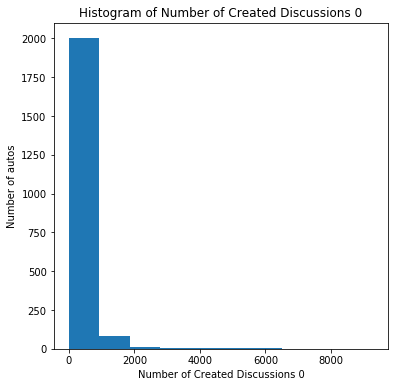

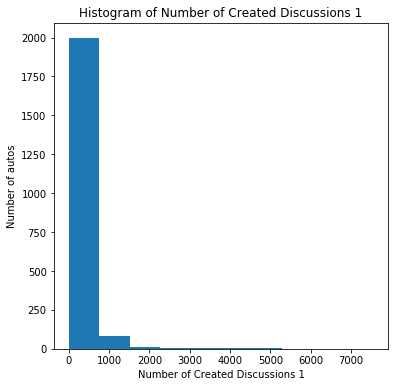

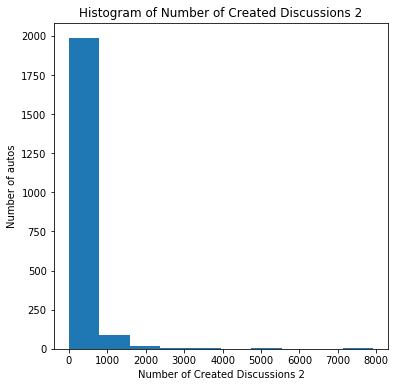

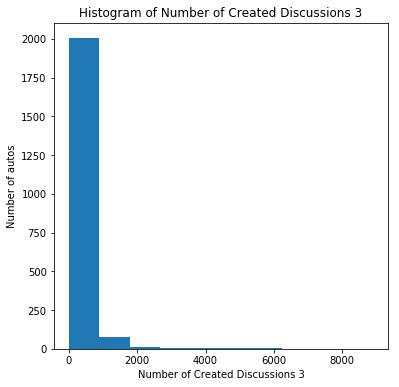

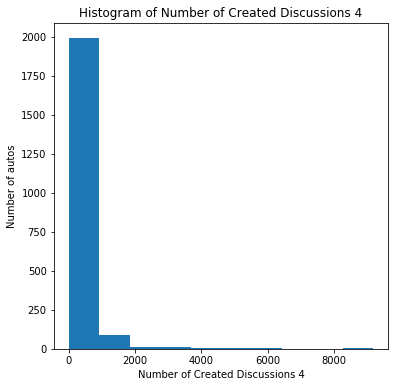

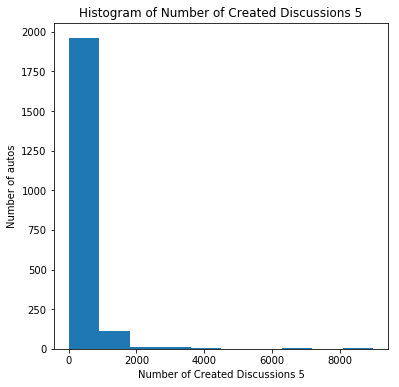

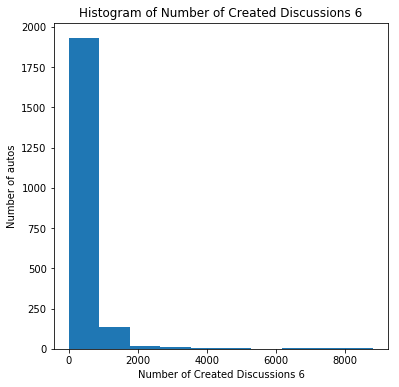

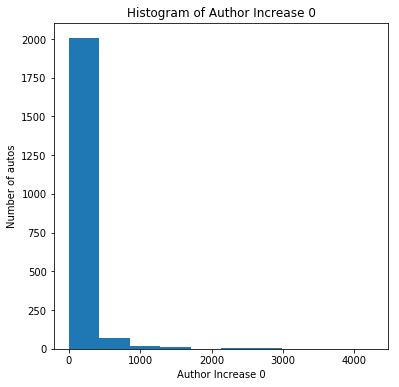

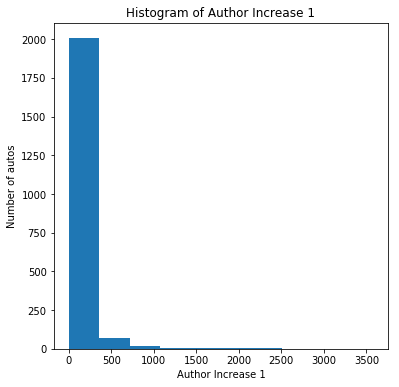

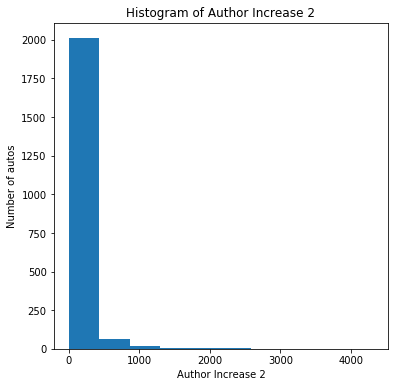

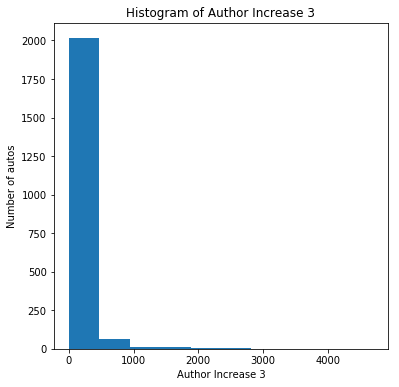

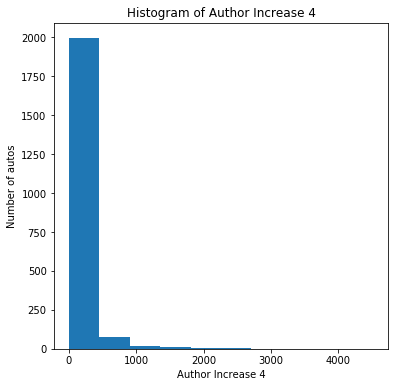

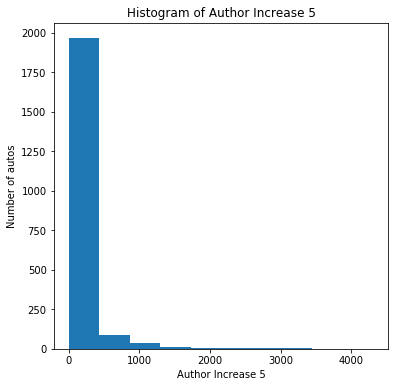

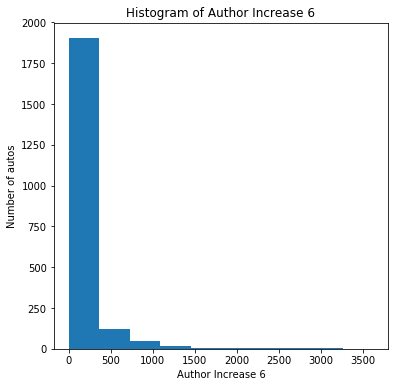

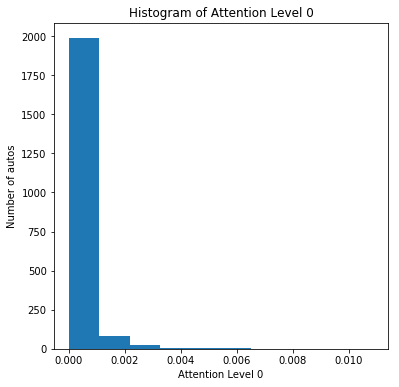

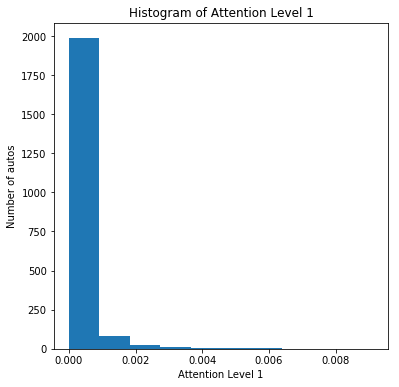

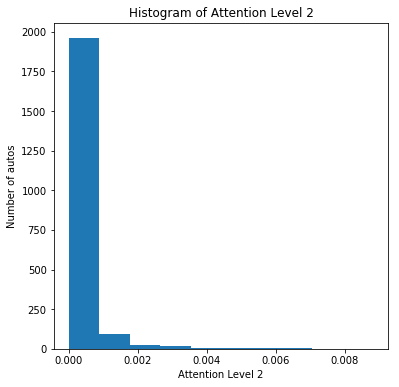

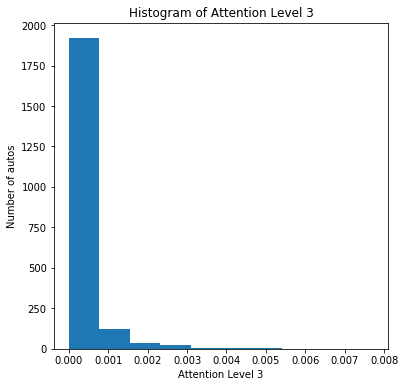

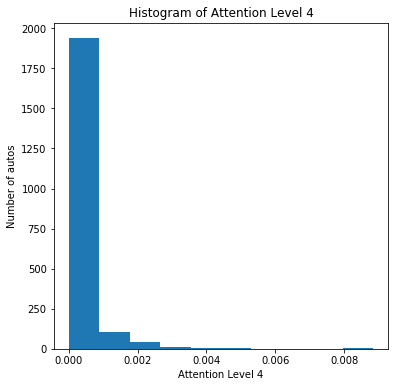

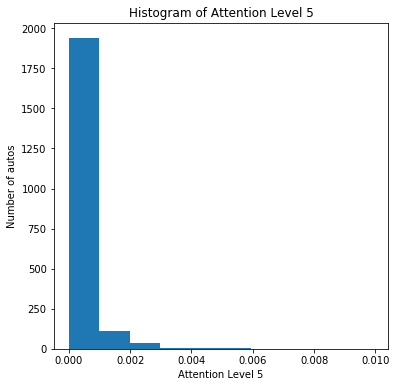

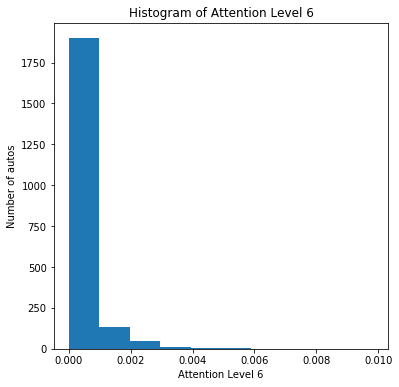

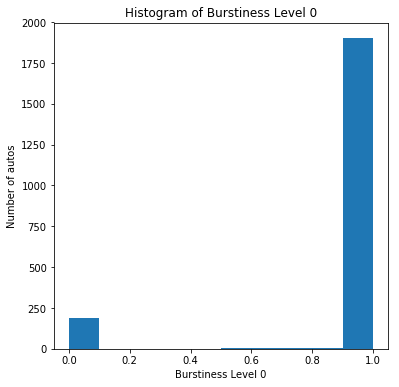

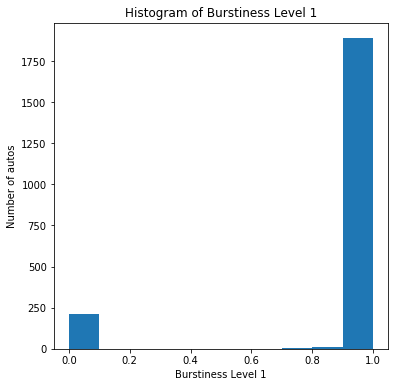

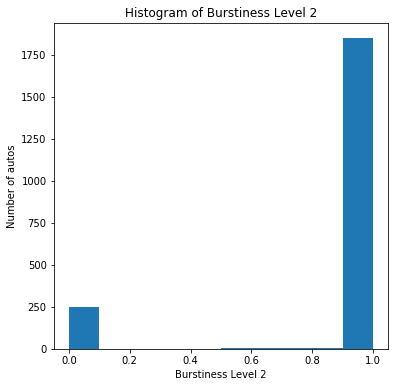

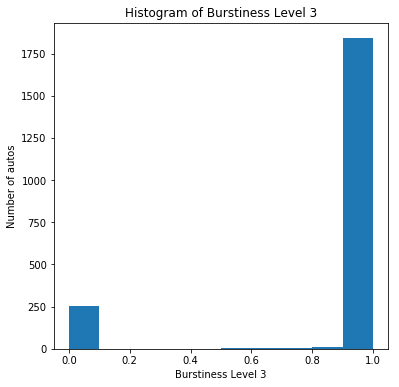

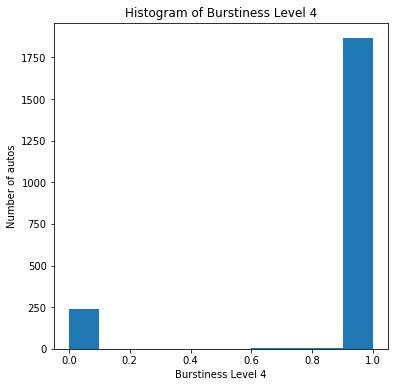

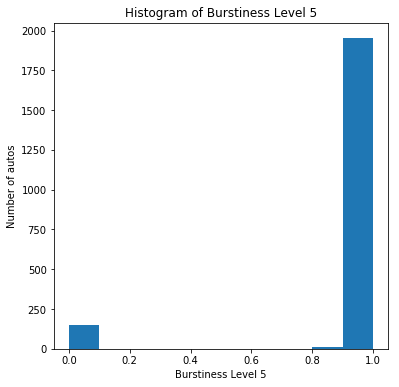

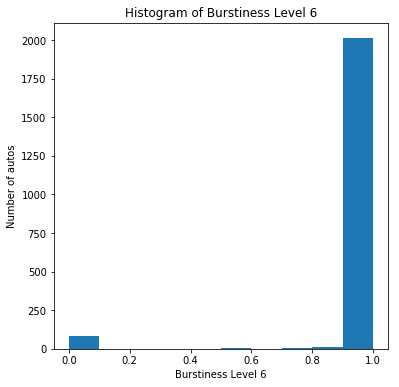

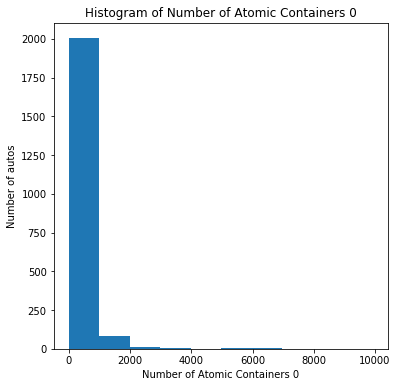

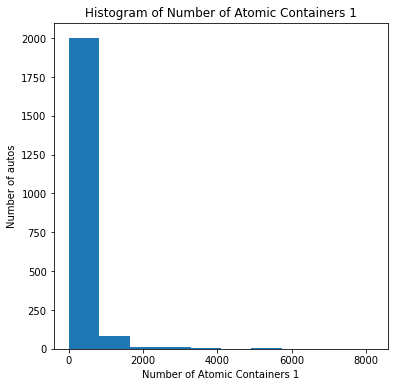

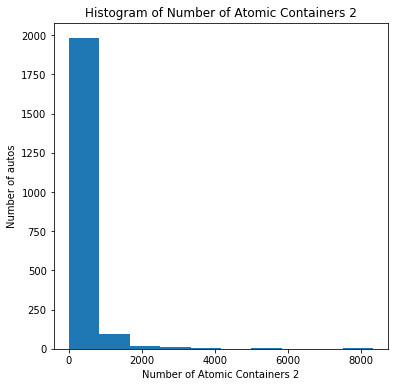

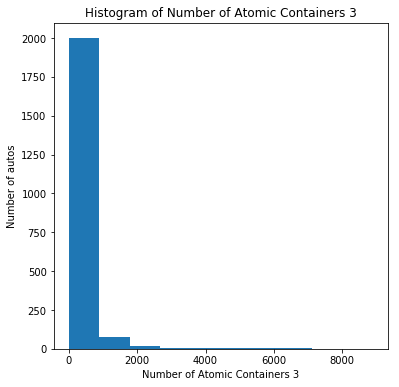

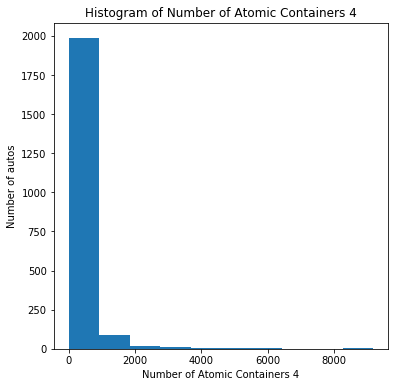

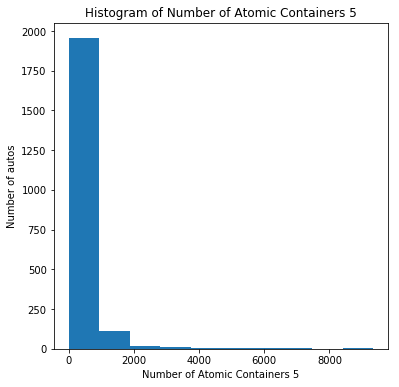

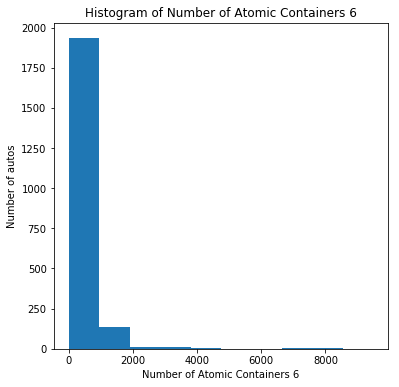

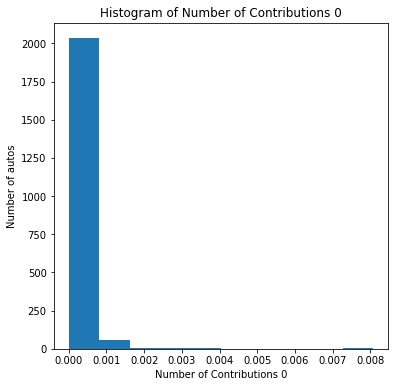

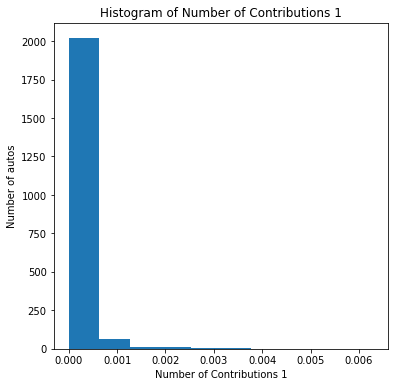

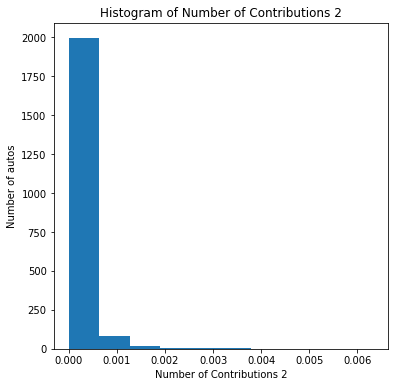

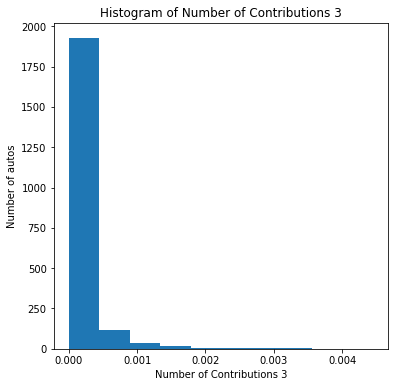

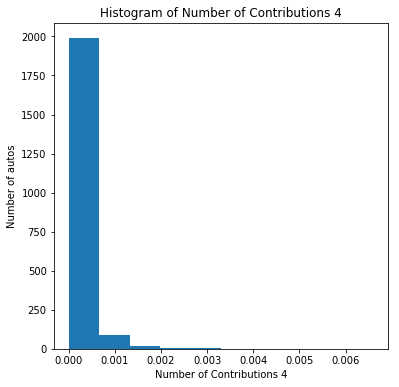

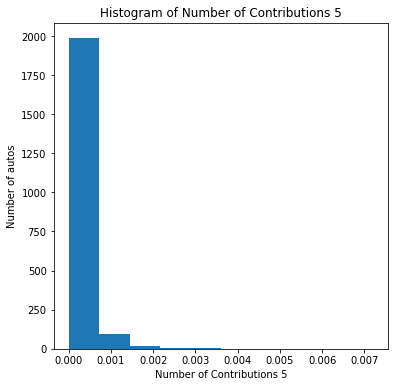

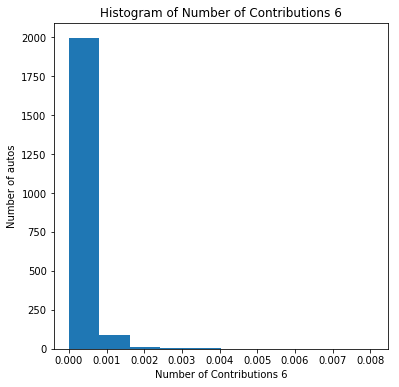

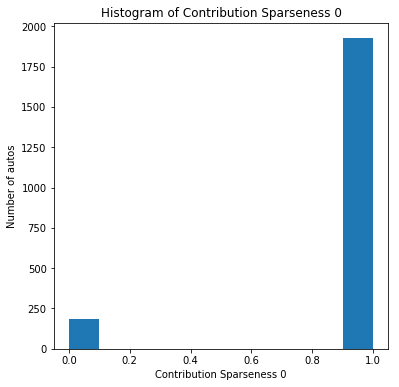

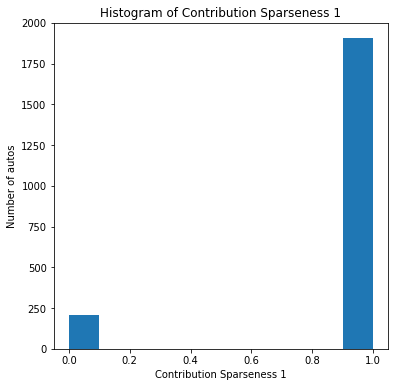

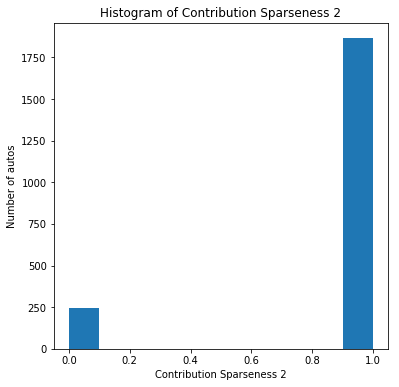

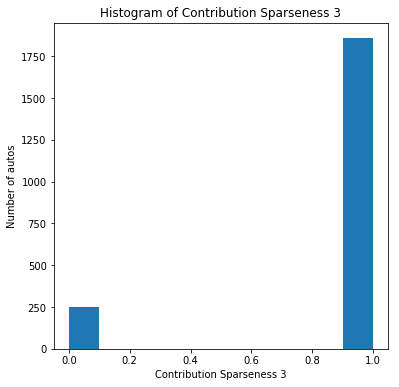

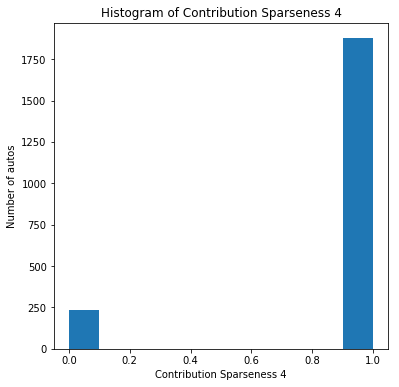

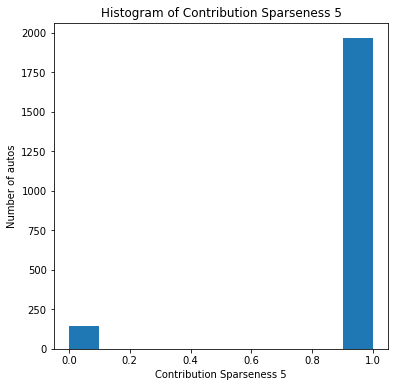

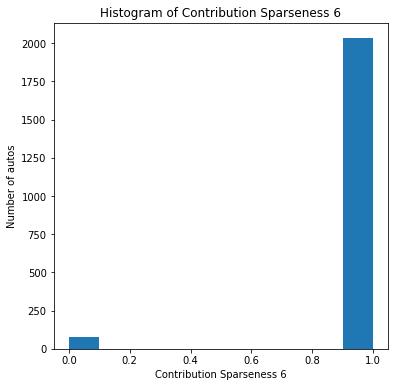

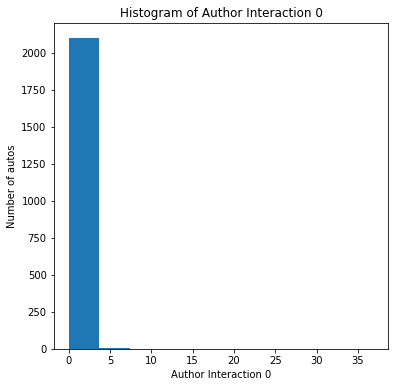

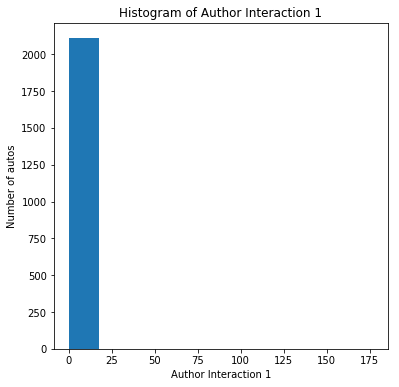

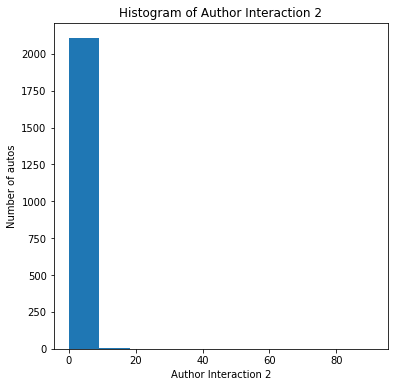

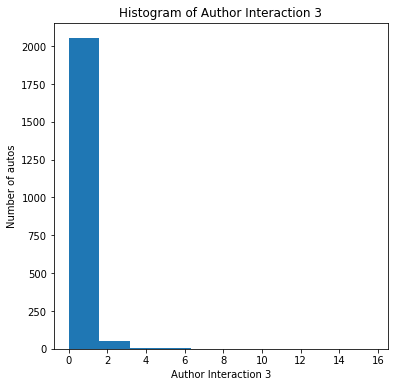

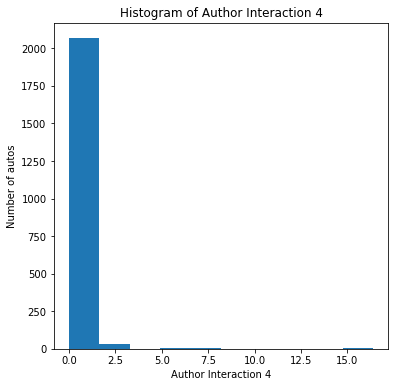

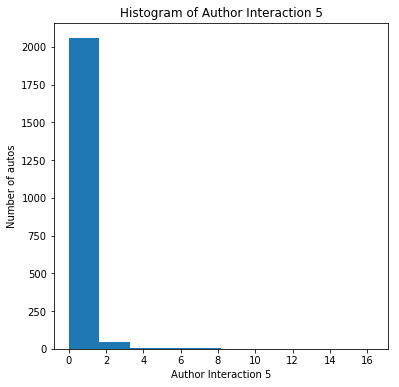

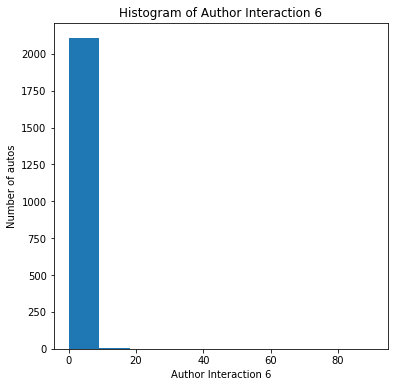

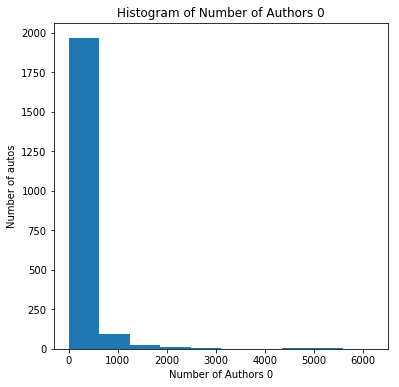

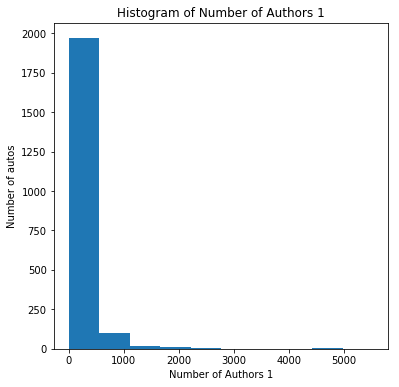

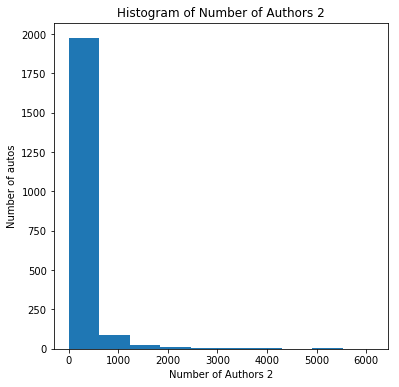

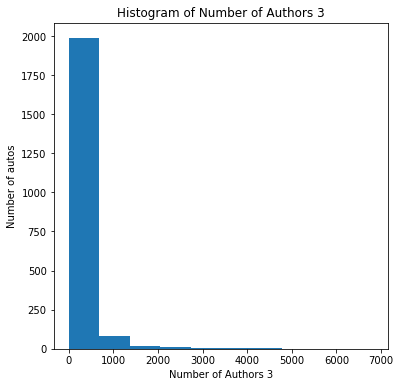

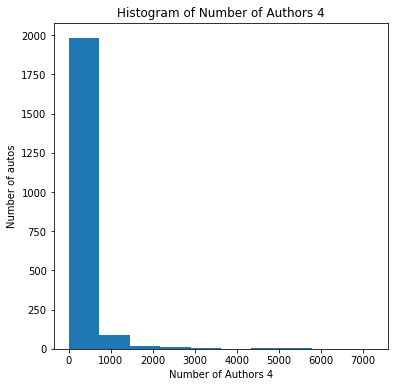

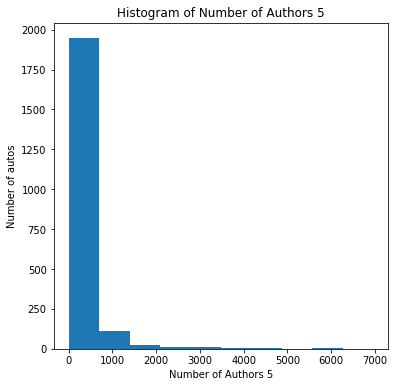

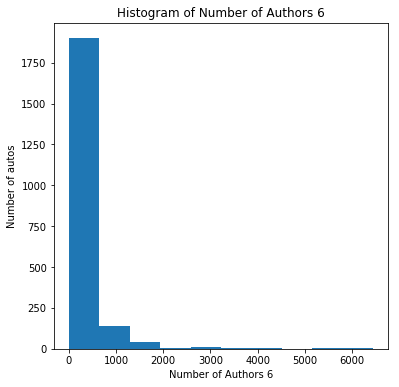

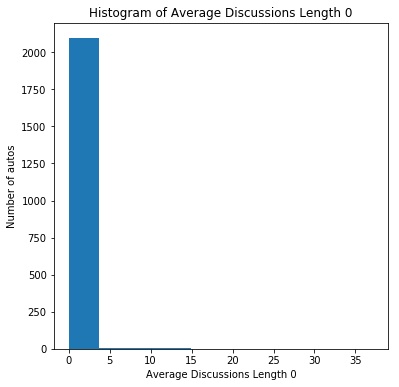

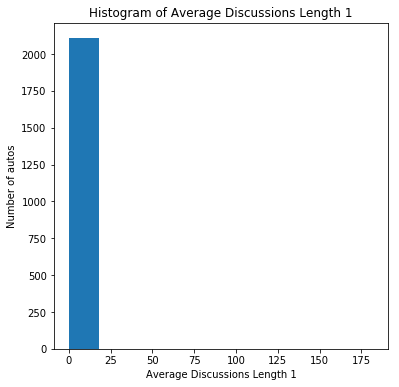

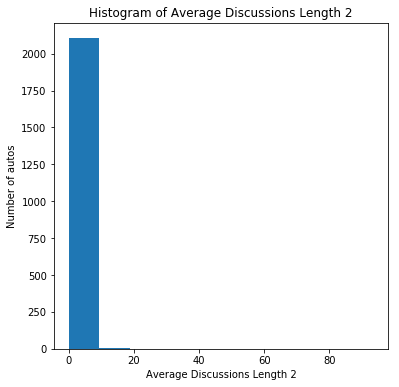

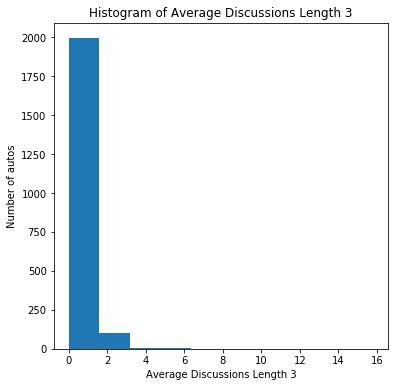

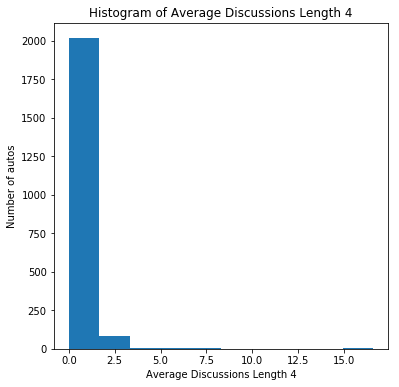

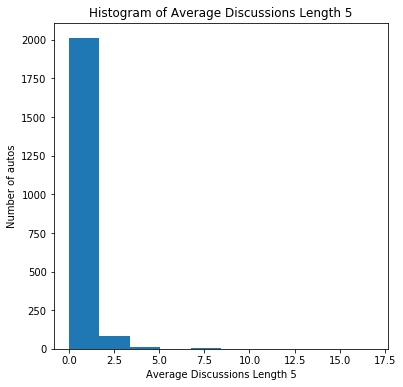

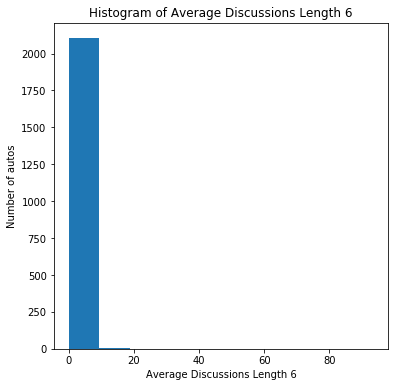

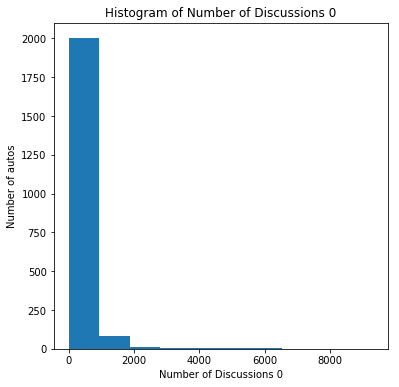

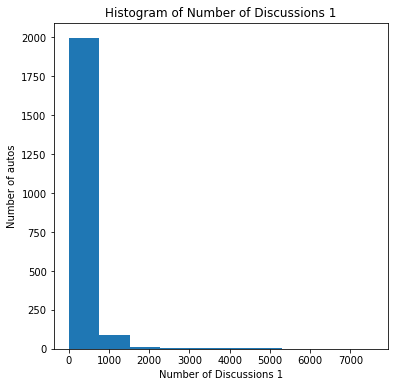

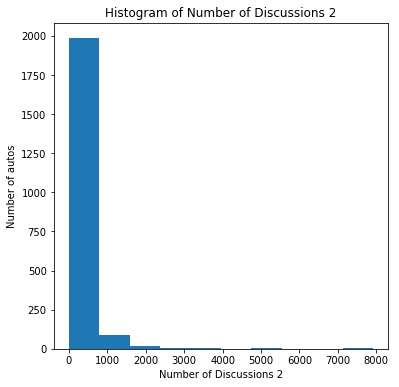

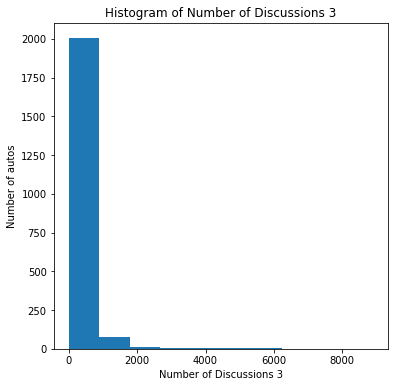

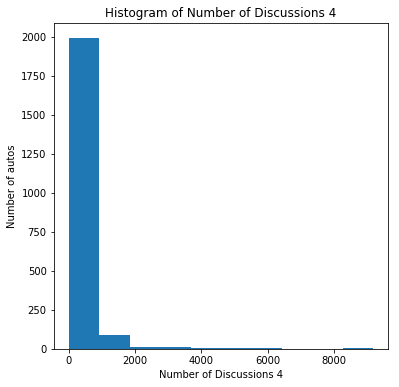

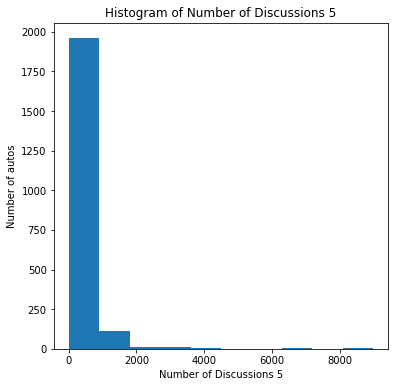

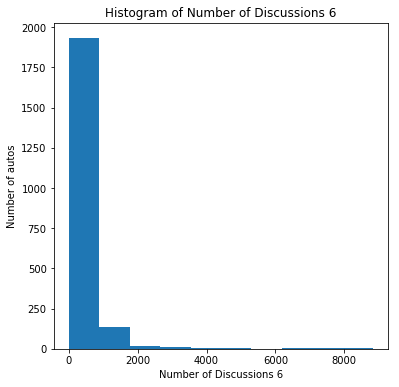

In [10]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
    
plot_histogram(X, X.columns)

In [11]:
X.shape

(2111, 77)

### Justification of type of scaling used

In the next step we have to rescale data. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables. We used MinMax scaler function from the Scikit Learn preprocessing package.
We used MinMaxScaler to scale the data. As we know, StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different. StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
MinMaxScaler rescales the data set such that all feature values are in the range [0,1].Based on the Histograms above, outliers are present in this dataset. So it's better to use MinMaxScaler for this dataset.

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [14]:
Labels=np.array(y_train)
Features=np.array(X_train)

In [15]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [16]:
X.describe()

,Number of Created Discussions 0,Number of Created Discussions 1,Number of Created Discussions 2,Number of Created Discussions 3,Number of Created Discussions 4,Number of Created Discussions 5,Number of Created Discussions 6,Author Increase 0,Author Increase 1,Author Increase 2,...,Average Discussions Length 4,Average Discussions Length 5,Average Discussions Length 6,Number of Discussions 0,Number of Discussions 1,Number of Discussions 2,Number of Discussions 3,Number of Discussions 4,Number of Discussions 5,Number of Discussions 6
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,187.896731,165.290384,180.579346,187.937944,204.529607,231.082899,258.270014,92.859308,82.454761,91.407864,...,1.022870,1.080823,1.218199,188.451919,165.742302,181.049739,188.405021,205.066319,231.603032,258.837044
std,528.295789,466.705718,506.311792,522.085806,573.953566,629.655786,668.264313,249.347687,224.217949,250.367678,...,0.752037,0.707228,2.184318,529.205767,467.456480,507.230990,522.809122,574.833521,630.491685,669.114378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000
50%,23.000000,22.000000,22.000000,22.000000,25.000000,29.000000,34.000000,14.000000,13.000000,13.000000,...,1.000000,1.000000,1.000000,23.000000,22.000000,22.000000,22.000000,25.000000,29.000000,35.000000
75%,140.000000,125.000000,138.000000,142.000000,157.000000,178.000000,209.000000,72.000000,69.500000,74.500000,...,1.066667,1.087359,1.100000,140.500000,125.500000,139.500000,143.000000,159.000000,178.000000,209.500000
max,9290.000000,7545.000000,7917.000000,8902.000000,9186.000000,8994.000000,8810.000000,4262.000000,3580.000000,4317.000000,...,16.579645,16.844339,93.500000,9318.000000,7566.000000,7917.000000,8902.000000,9186.000000,8994.000000,8839.000000


## KNN Classifier

Plotting the graph to see which k is suitable for our data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,30):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

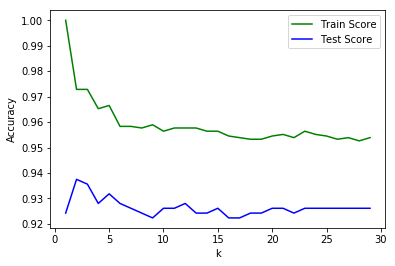

In [18]:
x_axis = range(1,30)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### KNN Classifier model Grid Search with Cross Validation

Performing Grid Search with Cross-Validation to find the best k.

In [19]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
#knn train score
grid_knn.score(X_train, y_train)

0.9909181088863849

In [20]:
#knn test score
grid_knn.score(X_test, y_test)

0.953746080176286

Getting best number of k.

In [21]:
#best number of neighbors
grid_knn.best_params_

{'n_neighbors': 20}

Best k is 20.

Getting Train and Test score using best parameter of k.

In [22]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9545
Train score: 0.9261


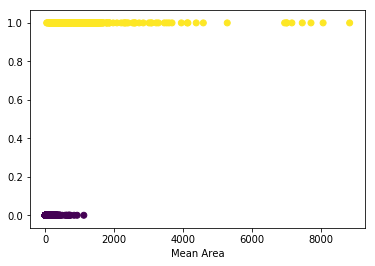

In [23]:
X_area = X.iloc[:,76]

plt.scatter(X_area, y, c = y)
plt.xlabel('Mean Area')
plt.show()

In [24]:
grid_knn.cv_results_['mean_test_score']

array([0.91912117, 0.96673556, 0.97352209, 0.97666237, 0.97865055])

In [25]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [26]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.90 


Train and test auc scores are 0.95 and 0.90 respectively.
The code in the cell below implements a function that computes and displays the classifier performance metrics using the best parameter, k=20. The code metrics are computed using the precision_recall_fscore_support and accuracy_score functions from the metrics package of scikit-learn. The confusion matrix is computed using the confusion_matrix function from this same package. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       396                18
Actual negative        19                95

Accuracy        0.93
AUC             0.95
Macro precision 0.90
Macro recall    0.89
 
           Positive      Negative
Num case      414           114
Precision    0.95          0.84
Recall       0.96          0.83
F1           0.96          0.84


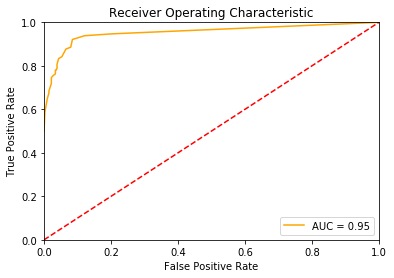

In [27]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = knn.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

Examining the results:

1. Looking at confusion matrix, most of the positive and negative cases are correctly classified 
The overall accuracy is 0.93. 
2. We can observe number of positive and negative cases. The class imbalance is confirmed. 414 are positive and 114 are negative.
3. The precision, recall and F1 all show that positive cases are classified reasonably well, but the negative cases are not as classified as good. We don't want to predict a non buzz twit as buzz so negative cases are important to us.
the graph computes and displays the ROC curve and AUC. The roc_curve and auc functions from the scikit-learn metrics package are used to compute these values.

Getting confusion matrix of KNN.

In [28]:
print("\nKNN confusion matrix:")
print(confusion_matrix(y_test, y_knn_predict))


KNN confusion matrix:
[[400  14]
 [ 25  89]]


#### KNN precision, recall, f1-score

In [29]:
print("\nKNN scores:")
print(classification_report(y_test, y_knn_predict, target_names=["non buzz", "buzz"]))


KNN scores:
             precision    recall  f1-score   support

   non buzz       0.94      0.97      0.95       414
       buzz       0.86      0.78      0.82       114

avg / total       0.92      0.93      0.92       528



We are trying to minimize false positive error, meaning minimize prediciting the twits which are non buzz as buzz, since the cost corresponding to that can be high. 

In [30]:
report_table=0
report_table1 = [['knn', 'k = 20', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]
report_table1

[['knn',
  'k = 20',
  0.9909181088863849,
  0.953746080176286,
  0.9453254648944583,
  0.902627070245574]]

Summary of the KNN model can be seen in the table below.

In [31]:
report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 20,0.990918,0.953746,0.945325,0.902627


## logistic Regression 

We do the following steps for logistic regression:
1. Defining a logistic regression model object using the LogisticRegression method from the scikit-learn linear_model package.
2. Fitting the linear model using the numpy arrays of the features and the labels for the training data set.

In [32]:
logistic_mod = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The model has been computed. The configuration of the model object has been printed. Only default settings are shown, since no arguments were given to create the model object.

#### Logistic Regression precision, recall, f1-score

The code in the cell below implements a function that computes and displays the classifier performance metrics. The code metrics are computed using the precision_recall_fscore_support and accuracy_score functions from the metrics package of scikit-learn. The confusion matrix is computed using the confusion_matrix function from this same package. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       393                21
Actual negative        11               103

Accuracy        0.94
AUC             0.98
Macro precision 0.90
Macro recall    0.93
 
           Positive      Negative
Num case      414           114
Precision    0.97          0.83
Recall       0.95          0.90
F1           0.96          0.87


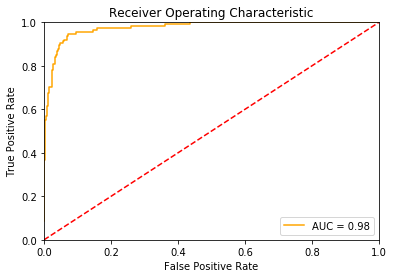

In [33]:
logistic_mod = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

Examining the results:

1. Looking at confusion matrix, most of the positive and negative cases are correctly classified 
The overall accuracy is 0.94. 
2. We can observe number of positive and negative cases. The class imbalance is confirmed. 414 are positive and 114 are negative.
4. The precision, recall and F1 all show that positive cases are classified reasonably well, but the negative cases are less reasonable.

the graph computes and displays the ROC curve and AUC. The roc_curve and auc functions from the scikit-learn metrics package are used to compute these values.

#### Cross Validation Model

In the below code we performed Cross validate model of logistic regression.

In [34]:
Labels= Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
logistic_mod = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55}) 
logisticscores = ms.cross_validate(logistic_mod, Features, Labels, scoring=scoring,
                        cv=10, return_train_score=False)
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(logisticscores)    

         Precision     Recall       AUC
Fold  1    0.964        0.923      0.994
Fold  2    0.955        0.893      0.989
Fold  3    0.942        0.901      0.986
Fold  4    0.923        0.923      0.975
Fold  5    0.953        0.973      0.997
Fold  6    0.940        0.969      0.996
Fold  7    0.935        0.954      0.987
Fold  8    0.967        0.977      0.997
Fold  9    0.943        0.943      0.994
Fold 10    0.988        0.955      0.999
----------------------------------------
Mean       0.951        0.941      0.991
Std        0.018        0.028      0.007


#### Optimizing hyperparameters Grid Search with Cross-Validation

In [35]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 0:0.55}) 

## Perform the grid search with cross-validation over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
## Fit thhe cross validated grid search over the data 
clf.fit(Features, Labels)
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
clf.best_estimator_.C

[0.96825397 0.97234247 0.97450697 0.97811448 0.97979798]
[0.99792627 0.9983871  0.99815668 0.9983871  0.99769585]
[0.98549383 0.98734568 0.9904321  0.99197531 0.99135802]
[0.98002323 0.98188153 0.98234611 0.98559814 0.98675958]
[0.99547511 0.996337   0.99741435 0.9984917  0.99698341]
[0.99671053 0.99671053 0.99714912 0.99692982 0.99649123]
[0.98360192 0.98840826 0.99067006 0.99208369 0.99095278]
[0.9844367  0.98722416 0.9902439  0.99117305 0.99070848]
[0.98246812 0.98406193 0.9863388  0.9879326  0.98724954]
[0.9890625  0.99036458 0.9921875  0.99375    0.99114583]


100

Plotting the graph of all values of C parameter.

Performance metrics by parameter
Parameter   Mean performance   STD performance
    0.10        0.98635            0.00852
    1.00        0.98831            0.00746
   10.00        0.98994            0.00700
  100.00        0.99144            0.00599
 1000.00        0.99091            0.00518


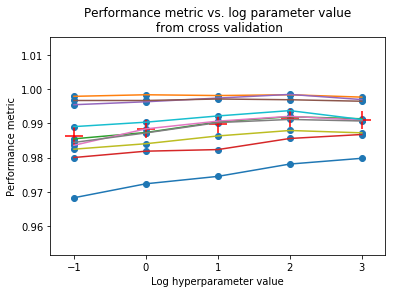

In [36]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

In [37]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.992
SDT of the metric       = 0.005
Outcomes by cv fold
Fold  1    0.996
Fold  2    0.979
Fold  3    0.993
Fold  4    0.995
Fold  5    0.997
Fold  6    0.995
Fold  7    0.990
Fold  8    0.990
Fold  9    0.995
Fold 10    0.988


                 Confusion matrix
                 Score positive    Score negative
Actual positive       393                21
Actual negative        11               103

Accuracy        0.94
AUC             0.98
Macro precision 0.90
Macro recall    0.93
 
           Positive      Negative
Num case      414           114
Precision    0.97          0.83
Recall       0.95          0.90
F1           0.96          0.87


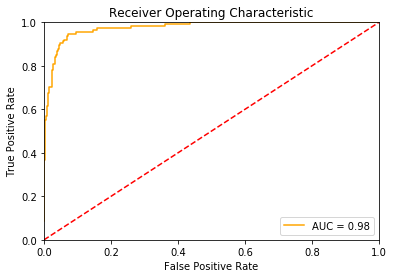

In [38]:
logistic_mod = linear_model.LogisticRegression(C = 100, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

In [39]:
clf.best_params_

{'C': 100}

Getting Test and Train scores with c=100.

In [41]:
logistic_mod1 = linear_model.LogisticRegression(C = 100.0, class_weight = {0:0.45, 1:0.55}) 
logistic_mod1.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9545
Train score: 0.9261


In [42]:
y_clf_predict = clf.predict(X_test)
y_clf_train_predict = clf.predict(X_train)

In [43]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_clf_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_clf_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.91 


In [44]:
report_table2 = [['log reg', 'C = 100', clf.score(X_train, y_train), clf.score(X_test, y_test), roc_auc_score(y_clf_train_predict, y_train), roc_auc_score(y_clf_predict, y_test) ]]
report_table2

[['log reg',
  'C = 100',
  0.9933763832307648,
  0.9766717518433765,
  0.9505992954519418,
  0.9085202544358889]]

In [45]:
report = pd.DataFrame(report_table2,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,log reg,C = 100,0.993376,0.976672,0.950599,0.90852


## Linear Support Vector Machine

An SVM attempts to maximally seperate classes by finding the suport vector with the lowest error rate or maximum separation. SVMs can use many types of kernel functions. The most common kernel functions are linear and the radial basis function or RBF. The linear basis function attempts to separate classes by finding hyperplanes in the feature space that maximally separate classes. The RBF uses set of local Gaussian shaped basis kernels to find a nonlinear separation of the classes.

Defining and fit a linear SVM model and Performing Grid search with Cross-Validation to find the best C value. The code in the cell below defines a linear SVM object using the LinearSVC function from the Scikit Learn SVM package, and then fits the model.

In [55]:
#grid search with cross-validation
svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 10, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [56]:
grid_svc_lin.best_params_

{'C': 10}

Best value of C is 10.

In [64]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)
report_table3 = report_table1+report_table2 + [['LinearSVC', 'C = 10', grid_svc_lin.score(X_train, y_train), grid_svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]
report_table3

[['knn',
  'k = 20',
  0.9909181088863849,
  0.953746080176286,
  0.9453254648944583,
  0.902627070245574],
 ['log reg',
  'C = 100',
  0.9933763832307648,
  0.9766717518433765,
  0.9505992954519418,
  0.9085202544358889],
 ['LinearSVC',
  'C = 10',
  0.9933763832307648,
  0.9755275870836511,
  0.9661847626540782,
  0.9148325358851674]]

In [58]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
svc_lin = LinearSVC()

## Perform the grid search with cross-validation over the parameters
clf = ms.GridSearchCV(estimator = svc_lin, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
## Fit thhe cross validated grid search over the data 
clf.fit(Features, Labels)
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
clf.best_estimator_.C

[0.97089947 0.97402597 0.97498797 0.97426647 0.97691198]
[0.9983871  0.99792627 0.99792627 0.99493088 0.99447005]
[0.9882716  0.99166667 0.99290123 0.99228395 0.99135802]
[0.9825784  0.98327526 0.98675958 0.98977933 0.98861789]
[0.996337   0.9984917  0.9984917  0.99719888 0.99719888]
[0.99671053 0.99692982 0.99671053 0.99671053 0.99671053]
[0.99038733 0.99236641 0.99321459 0.99208369 0.99349731]
[0.98908246 0.98977933 0.99279907 0.9902439  0.99047619]
[0.98474499 0.98679417 0.9879326  0.9863388  0.98656648]
[0.99010417 0.99375    0.99322917 0.99114583 0.99088542]


10

Plotting the graph for all values of C.

Performance metrics by parameter
Parameter   Mean performance   STD performance
    0.10        0.98875            0.00769
    1.00        0.99050            0.00717
   10.00        0.99150            0.00659
  100.00        0.99050            0.00625
 1000.00        0.99067            0.00559


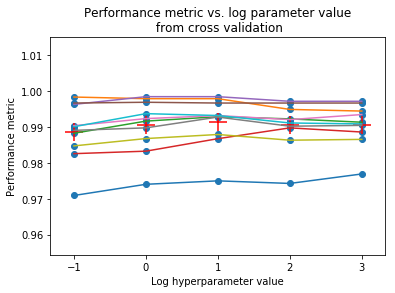

In [59]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

performing the outer cross validation of the model.

In [60]:
svc_lin = LinearSVC(C=10)
svc_lin.fit(X_train, y_train)
nr.seed(498)
cv_estimate = ms.cross_val_score(svc_lin, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.967
SDT of the metric       = 0.008
Outcomes by cv fold
Fold  1    0.969
Fold  2    0.950
Fold  3    0.962
Fold  4    0.962
Fold  5    0.975
Fold  6    0.975
Fold  7    0.962
Fold  8    0.968
Fold  9    0.981
Fold 10    0.962


Getting confusion matrix of Linear SVC.

In [61]:
print("\nLinear SVM confusion matrix:")
print(confusion_matrix(y_test, y_svc_lin_predict))


Linear SVM confusion matrix:
[[400  14]
 [ 18  96]]


#### Linear SVC precision, recall, f1-score

In [62]:
print("\nLinear SVC scores:")
print(classification_report(y_test, y_svc_lin_predict, target_names=["non buzz", "buzz"]))


Linear SVC scores:
             precision    recall  f1-score   support

   non buzz       0.96      0.97      0.96       414
       buzz       0.87      0.84      0.86       114

avg / total       0.94      0.94      0.94       528



In [ ]:
Non buzz twits are better classified than buzz twits.

In [65]:
report = pd.DataFrame(report_table3,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 20,0.990918,0.953746,0.945325,0.902627
1,log reg,C = 100,0.993376,0.976672,0.950599,0.908520
2,LinearSVC,C = 10,0.993376,0.975528,0.966185,0.914833


## Kernelized Support Vector Machine

The code in the cell below uses the SVC function to define a nonlinear model. This model is fit with the training data and displays the evaluation of the model.

In [66]:
nr.seed(1115)
svm_mod = svm.SVC()
svm_mod.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Nested cross validation is used to estimate the optimal hyperparameters and perform model selection for the nonlinear SVM model. 5 fold cross validation is used since training SVMs are computationally intensive to train. Additional folds would give better estimates but at the cost of greater computation time. 

#### Optimizing hyperparameters Grid Search with Cross-Validation

The code in the cell below estimates the best hyperparameters using 5 fold cross validation. 
1. In this case, a grid of two hyperparameters: C is the inverse of lambda of l2 regularization, and gamma is the span of the RBF kernel.
2. The model is fit on the grid and the best estimated hyperparameters are printed.

In [67]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

1000
0.005


performing the outer cross validation of the model. 

In [68]:
svm_mod = svm.SVC(C=1000,gamma=0.005)
svm_mod.fit(X_train, y_train)

nr.seed(498)
cv_estimate = ms.cross_val_score(svm_mod, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.967
SDT of the metric       = 0.008
Outcomes by cv fold
Fold  1    0.969
Fold  2    0.950
Fold  3    0.962
Fold  4    0.968
Fold  5    0.975
Fold  6    0.975
Fold  7    0.962
Fold  8    0.962
Fold  9    0.981
Fold 10    0.962


Now, we will build and test a model using the estimated optimal hyperparameters.

The code in the cell below defines a nonlinear SVM model object using the estimated optimal model hyperparameters and then fits the model to the training data.

In [69]:
nr.seed(1115)
svm_mod = svm.SVC( C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.33, 1:0.67},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight={0: 0.33, 1: 0.67}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Kernelized SVC precision, recall, f1-score

The code in the cell below scores and prints evaluation metrics for the model, using the test data.

                 Confusion matrix
                 Score positive    Score negative
Actual positive       400                14
Actual negative        23                91

Accuracy        0.93
AUC             0.97
Macro precision 0.91
Macro recall    0.88
 
           Positive      Negative
Num case      414           114
Precision    0.95          0.87
Recall       0.97          0.80
F1           0.96          0.83


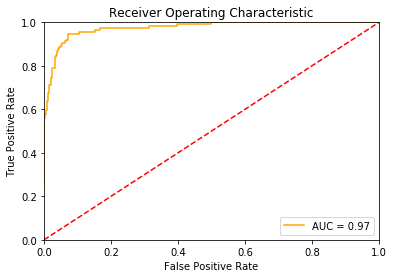

In [70]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    
plot_auc(y_test, probabilities)

Examining the results:

1. Looking at confusion matrix, most of the positive and negative cases are correctly classified 
The overall accuracy is 0.93. 
2. We can observe number of positive and negative cases. The class imbalance is confirmed. 414 are positive and 114 are negative.
4. The precision, recall and F1 all show that positive cases are classified reasonably well, but the negative cases are less reasonable.

the graph computes and displays the ROC curve and AUC. The roc_curve and auc functions from the scikit-learn metrics package are used to compute these values.

Below, we will perform another grid search with cross validation

In [72]:
#Grid Search with Cross-Validation using cv=5
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring = 'roc_auc',return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.01}
Best cross-validation score: 0.99


Getting best parameters for C=1000 and gamma=0.01.

fitting the model with optimized hyper parameters.

In [73]:
kernelized_svc = SVC(kernel='rbf', gamma=0.01, C=1000,class_weight = {0:0.45, 1:0.55})
kernelized_svc.fit(X_train, y_train)


SVC(C=1000, cache_size=200, class_weight={0: 0.45, 1: 0.55}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
pred_kernel = kernelized_svc.predict(X_test)
print("Test score: {:.2f}".format(kernelized_svc.score(X_test, y_test)))

Test score: 0.94


In [75]:
print("\nKernelized SVC confusion matrix:")
print(confusion_matrix(y_test, pred_kernel))


Kernelized SVC confusion matrix:
[[399  15]
 [ 17  97]]


In [76]:
print(classification_report(y_test, pred_kernel, target_names=["non buzz", "buzz"]))

             precision    recall  f1-score   support

   non buzz       0.96      0.96      0.96       414
       buzz       0.87      0.85      0.86       114

avg / total       0.94      0.94      0.94       528



<IPython.core.display.Javascript object>


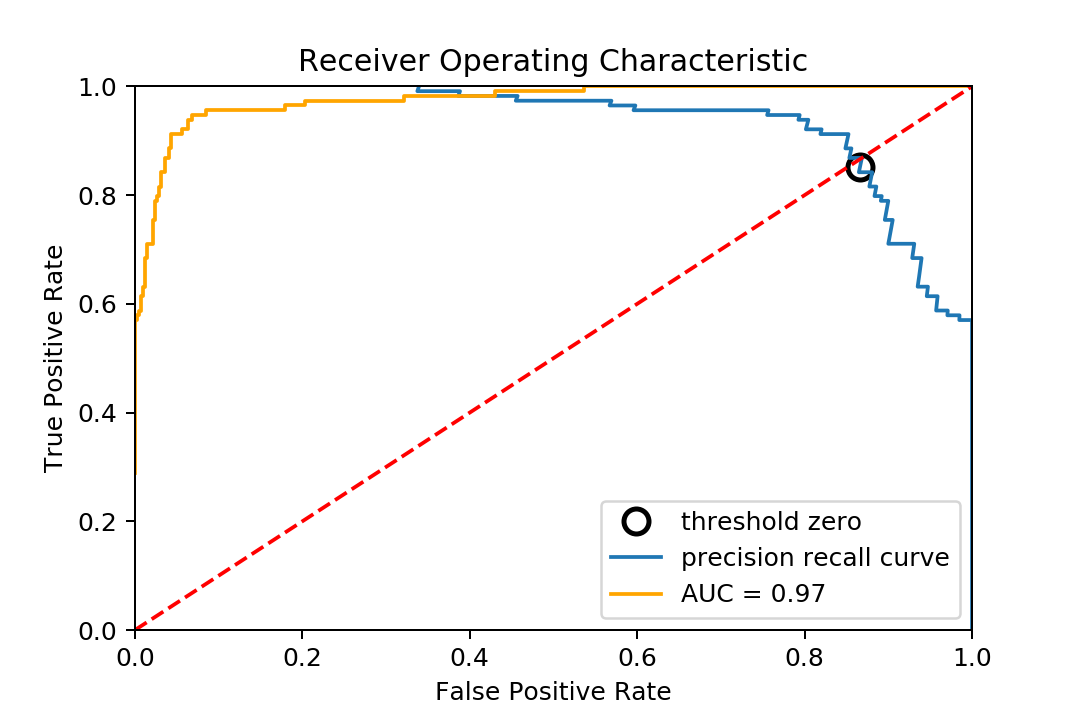

In [78]:
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, kernelized_svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [79]:
y_svc_ker_predict_train = kernelized_svc.predict(X_train)
y_svc_ker_predict = kernelized_svc.predict(X_test)
report_table4 =   report_table3 + [['KernelSVC', 'C = 1000,gamma = 0.01', kernelized_svc.score(X_train, y_train), kernelized_svc.score(X_test, y_test), roc_auc_score(y_svc_ker_predict_train, y_train), roc_auc_score(y_svc_ker_predict, y_test)]]
report_table4

[['knn',
  'k = 20',
  0.9909181088863849,
  0.953746080176286,
  0.9453254648944583,
  0.902627070245574],
 ['log reg',
  'C = 100',
  0.9933763832307648,
  0.9766717518433765,
  0.9505992954519418,
  0.9085202544358889],
 ['LinearSVC',
  'C = 10',
  0.9933763832307648,
  0.9755275870836511,
  0.9661847626540782,
  0.9148325358851674],
 ['KernelSVC',
  'C = 1000,gamma = 0.01',
  0.9684144030322173,
  0.9393939393939394,
  0.9551200394356023,
  0.912603021978022]]

Now we perform the below code again using the best hyper parameters to get more valid performance metrics.

In [80]:
nr.seed(1115)
kernelized_svc = SVC(kernel='rbf', gamma=0.01, C=1000,class_weight = {0:0.45, 1:0.55}, probability=True)
kernelized_svc.fit(X_train, y_train)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = kernelized_svc.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    
plot_auc(y_test, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       401                13
Actual negative        21                93

Accuracy        0.94
AUC             0.97
Macro precision 0.91
Macro recall    0.89
 
           Positive      Negative
Num case      414           114
Precision    0.95          0.88
Recall       0.97          0.82
F1           0.96          0.85


In [81]:
report = pd.DataFrame(report_table4,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 20,0.990918,0.953746,0.945325,0.902627
1,log reg,C = 100,0.993376,0.976672,0.950599,0.908520
2,LinearSVC,C = 10,0.993376,0.975528,0.966185,0.914833
3,KernelSVC,"C = 1000,gamma = 0.01",0.968414,0.939394,0.955120,0.912603


## Desicion Tree

In [82]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'roc_auc',return_train_score=True)

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Getting the best hyper parameters for max_depth.

In [84]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.96


In [85]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.94


In [86]:
print("\nDecision tree confusion matrix:")
print(confusion_matrix(y_test, pred_tree))


Decision tree confusion matrix:
[[392  22]
 [ 10 104]]


In [87]:
print(classification_report(y_test, pred_tree, target_names=["non buzz", "buzz"]))

             precision    recall  f1-score   support

   non buzz       0.98      0.95      0.96       414
       buzz       0.83      0.91      0.87       114

avg / total       0.94      0.94      0.94       528



In [88]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.932


In [89]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.939


<IPython.core.display.Javascript object>


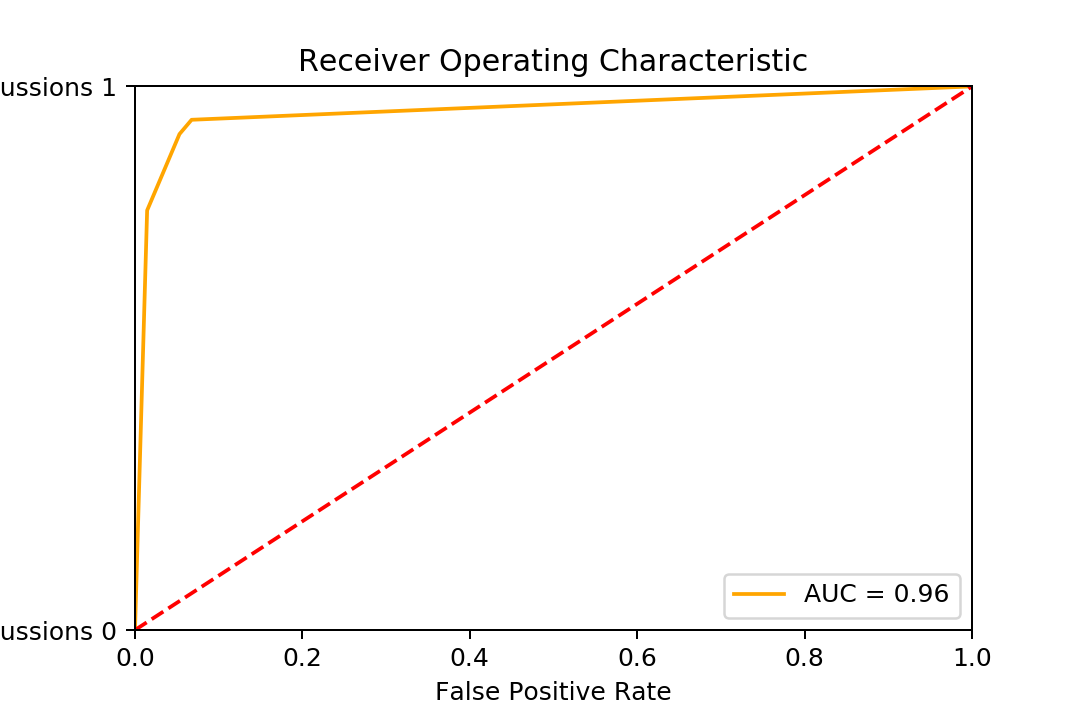

In [90]:
%matplotlib notebook
def plot(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot(dtree)

In [91]:
nr.seed(1115)
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = dtree.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    
plot_auc(y_test, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       392                22
Actual negative        10               104

Accuracy        0.94
AUC             0.96
Macro precision 0.90
Macro recall    0.93
 
           Positive      Negative
Num case      414           114
Precision    0.98          0.83
Recall       0.95          0.91
F1           0.96          0.87


In [92]:
y_svc_tree_predict_train = dtree.predict(X_train)
y_svc_tree_predict = dtree.predict(X_test)
report_table5 =   report_table4 + [['DecisionTree', 'max_depth = 2', dtree.score(X_train, y_train), dtree.score(X_test, y_test), roc_auc_score(y_svc_tree_predict_train, y_train), roc_auc_score(y_svc_tree_predict, y_test)]]
report_table5

[['knn',
  'k = 20',
  0.9909181088863849,
  0.953746080176286,
  0.9453254648944583,
  0.902627070245574],
 ['log reg',
  'C = 100',
  0.9933763832307648,
  0.9766717518433765,
  0.9505992954519418,
  0.9085202544358889],
 ['LinearSVC',
  'C = 10',
  0.9933763832307648,
  0.9755275870836511,
  0.9661847626540782,
  0.9148325358851674],
 ['KernelSVC',
  'C = 1000,gamma = 0.01',
  0.9684144030322173,
  0.9393939393939394,
  0.9551200394356023,
  0.912603021978022],
 ['DecisionTree',
  'max_depth = 2',
  0.9602021478205938,
  0.9393939393939394,
  0.9306265736310838,
  0.900260601753139]]

# Conclusion: Selection of the best model
### Precision, recall and f1-score of all models with the best hyperparameter

In [93]:
print("\nKNN scores:")
print(classification_report(y_test, y_knn_predict, target_names=["non buzz", "buzz"]))
print("\nLog Reg scores:")
print(classification_report(y_test, y_clf_predict, target_names=["non buzz", "buzz"]))
print("\nLinear SVC scores:")
print(classification_report(y_test, y_svc_lin_predict, target_names=["non buzz", "buzz"]))
print("\nKernel SVC scores:")
print(classification_report(y_test, pred_kernel, target_names=["non buzz", "buzz"]))
print("\nDecision Tree scores:")
print(classification_report(y_test, pred_tree, target_names=["non buzz", "buzz"]))


KNN scores:
             precision    recall  f1-score   support

   non buzz       0.94      0.97      0.95       414
       buzz       0.86      0.78      0.82       114

avg / total       0.92      0.93      0.92       528


Log Reg scores:
             precision    recall  f1-score   support

   non buzz       0.96      0.96      0.96       414
       buzz       0.85      0.87      0.86       114

avg / total       0.94      0.94      0.94       528


Linear SVC scores:
             precision    recall  f1-score   support

   non buzz       0.96      0.97      0.96       414
       buzz       0.87      0.84      0.86       114

avg / total       0.94      0.94      0.94       528


Kernel SVC scores:
             precision    recall  f1-score   support

   non buzz       0.96      0.96      0.96       414
       buzz       0.87      0.85      0.86       114

avg / total       0.94      0.94      0.94       528


Decision Tree scores:
             precision    recall  f1-score   su

### Table of model parameters and test/train scores

In [95]:
report = pd.DataFrame(report_table5,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 20,0.990918,0.953746,0.945325,0.902627
1,log reg,C = 100,0.993376,0.976672,0.950599,0.908520
2,LinearSVC,C = 10,0.993376,0.975528,0.966185,0.914833
3,KernelSVC,"C = 1000,gamma = 0.01",0.968414,0.939394,0.955120,0.912603
4,DecisionTree,max_depth = 2,0.960202,0.939394,0.930627,0.900261


By looking at the table above and the precision for buzz, we can observe that Linear support Vector Machine is the best model to choose to predict buzz and non buzz twits.Train and Test scores of linear svc are high and close enough. also train and test auc scores are high enough for us to conclude that overal the Linear SVC is the best model to choose.
##### Justification of type of scaling used
In the next step we have to rescale data. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables. We used MinMax scaler function from the Scikit Learn preprocessing package. We used MinMaxScaler to scale the data. As we know, StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different. StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0,1].Based on the Histograms above, outliers are present in this dataset. So it's better to use MinMaxScaler for this dataset.

### Running the best model on the whole data set.

we are running the best model, which we concluded was Linear SVC on the whole dataset.

In [5]:
scaler = MinMaxScaler()
X1_train_org,X1_test_org,y1_train,y1_test=train_test_split(X1,y1)
X1_train=scaler.fit_transform(X1_train_org)
X1_test=scaler.transform(X1_test_org)

In [6]:
svc_lin = LinearSVC(C=10)
svc_lin.fit(X1_train, y1_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
y_svc_lin_predict_train = svc_lin.predict(X1_train)
y_svc_lin_predict = svc_lin.predict(X1_test)
report_table = [['LinearSVC', 'C = 10', svc_lin.score(X1_train, y1_train), svc_lin.score(X1_test, y1_test),
                 roc_auc_score(y_svc_lin_predict_train, y1_train), roc_auc_score(y_svc_lin_predict, y1_test)]]

In [10]:
print("\nLinear SVC scores:")
print(classification_report(y1_test, y_svc_lin_predict, target_names=["non buzz", "buzz"]))


Linear SVC scores:
             precision    recall  f1-score   support

   non buzz       0.97      0.99      0.98     28399
       buzz       0.94      0.87      0.91      6778

avg / total       0.97      0.97      0.97     35177



In [11]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,LinearSVC,C = 10,0.965488,0.965574,0.958273,0.956695
